In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

c:\Users\Mike\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
curve_fit_df = pd.read_excel('closest_alpha_pos_1_to_101_MaxC_60000_Grad_0.000405.xlsx')
curve_fit_df.head(10)

,Position,Alpha,Theory_Vel,Calc_Velocity,Vel_Percent_Error,Loss,Prob_Tum_Up,Prob_Tum_Down,Alpha_Curve_Fit
0,1,NaN,0.068255,NaN,NaN,NaN,NaN,NaN,8008.828876
1,2,NaN,0.077261,NaN,NaN,NaN,NaN,NaN,8742.684605
2,3,9164.660006,0.087437,0.081245,0.070815,0.265604,0.031061,0.031639,9164.660006
3,4,9147.692558,0.098930,0.103805,0.049277,0.288612,0.030975,0.031726,9147.692558
4,5,8564.719743,0.111902,0.117605,0.050958,0.293818,0.030905,0.031798,8564.719743
5,6,7486.818088,0.126537,0.127603,0.008422,0.294943,0.030852,0.031853,7486.818088
6,7,6575.164433,0.143037,0.143312,0.001920,0.289016,0.030792,0.031915,6575.164433
7,8,5858.040817,0.161625,0.167260,0.034859,0.293044,0.030716,0.031995,5858.040817
8,9,5164.492449,0.182549,0.178720,0.020979,0.292669,0.030640,0.032074,5164.492449
9,10,4572.080652,0.206080,0.190878,0.073766,0.295085,0.030543,0.032176,4572.080652


In [3]:
input_param_df = pd.read_excel('input_parameters.xlsx')
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max,Row Number
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185,1
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185,2
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185,3
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185,4
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185,5


In [60]:
alpha_df_l_dC = curve_fit_df.Alpha_Curve_Fit*input_param_df.attr_time_roc
# sin_h_func = lambda x: np.sinh(x)
sinh_a_df_l_dC = list(map(np.sinh, alpha_df_l_dC))
sinh_a_df_l_dC = pd.Series((sinh_a_df_l_dC))

<Figure size 640x480 with 0 Axes>

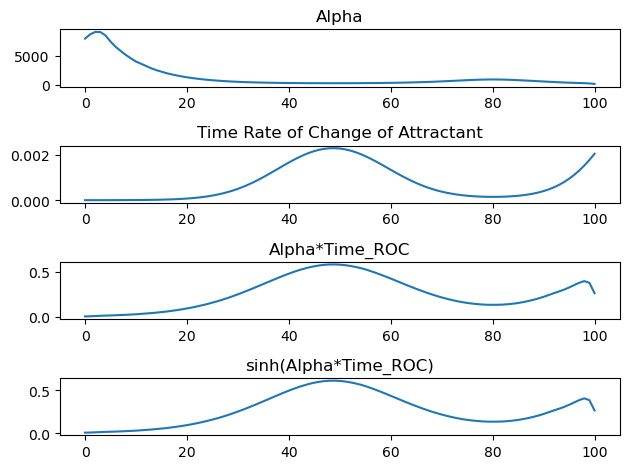

In [61]:
plt.clf()

fig, ax = plt.subplots(nrows=4)

ax[0].plot(curve_fit_df['Alpha_Curve_Fit'])
ax[0].set_title('Alpha') 

ax[1].plot(input_param_df['attr_time_roc'])
ax[1].set_title('Time Rate of Change of Attractant') 

ax[2].plot(alpha_df_l_dC)
ax[2].set_title('Alpha*Time_ROC') 

ax[3].plot(sinh_a_df_l_dC)
ax[3].set_title('sinh(Alpha*Time_ROC)') 
fig.tight_layout()

Using the Taoylor Series, sinh(x) = x + x^3/3! + ...
So the approximation can be made where sinh(x) ~ x, because Alpha*Time_ROC is so small.

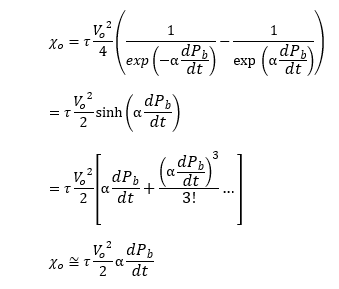

In the constant τ can now be determined:

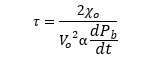

In [5]:
# Create a plot of the theoretical velocity vs average of the calculated velocity.

x_values = curve_fit_df['Position']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Calc_Velocity'],
    mode = 'markers',
    name = 'Calculated Ave. Velocity'
)
trace1 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Theory_Vel'],
    mode='lines',
    name='Theoretical Velocity',
    yaxis='y2'
)

# create the data
data = [trace0, trace1]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Calculated Average Drift Velocity vs Theoretical Drift Velocity',
    yaxis = dict(title = 'Drift Velocity [µm/s]'),
    yaxis2 = dict(
        overlaying = 'y',
        side = 'right'
        ),
    xaxis=dict(title='Deme')
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [5]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['Position']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Alpha'],
    mode = 'markers',
    name = 'alpha value points'
)
# The third trace
trace1 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Alpha_Curve_Fit'],
    mode = 'lines',
    name = 'polynomial fit'
)
trace2 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Theory_Vel'],
    mode='lines',
    name='Theoretical Velocity',
    yaxis='y2'
)

# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Alpha values and polynomial curve fit.  Outliers are where receptor sensitivity is too low that the program cannot calculate exponentially increasing values.',
    yaxis = dict(title = 'Alpha'),
    yaxis2 = dict(
        title = 'Theoretical Velocity [µm/s]',
        overlaying = 'y',
        side = 'right'
        ),
    xaxis=dict(title='Deme')
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [13]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df.loc[20:99, 'Position']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = curve_fit_df.loc[20:99, 'Alpha'],
    mode = 'markers',
    name = 'alpha value points'
)
# The third trace
trace1 = go.Scatter(
    x = x_values,
    y = curve_fit_df.loc[20:99, 'Alpha_Curve_Fit'],
    mode = 'lines',
    name = 'polynomial fit'
)
trace2 = go.Scatter(
    x = x_values,
    y = input_param_df.loc[20:99, 'attr_time_roc'],
    mode='lines',
    name='dP/dt',
    yaxis='y2'
)

# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Alpha values and polynomial curve fit.  Outliers are where receptor sensitivity is too low that the program cannot calculate exponentially increasing values.',
    yaxis = dict(title = 'Alpha [s]'),
    yaxis2 = dict(
        title = 'Time RoC of Attractant, dP/dt [attractant/s]',
        overlaying = 'y',
        side = 'right'
        ),
    xaxis=dict(title='Deme'),
    legend=dict(
        x=1,       # x position of the legend
        y=1,       # y position of the legend
        xanchor='right',  # anchor legend to the right
        yanchor='top'     # anchor legend to the top
    )
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [5]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['Position']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Prob_Tum_Up'],
    mode = 'lines',
    name = 'Rate of tumbling going down gradient'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Prob_Tum_Down'],
    mode = 'lines',
    name = 'Rate of tumbling going up gradient'
)
trace2 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Theory_Vel'],
    mode='markers',
    name='Theoretical Velocity',
    yaxis='y2'
)

# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = "Rate of Tumbling = exp(-1.16 +/- alpha*receptor)",
    yaxis = dict(title = 'Tumble Rate'),
    yaxis2 = dict(
        title = 'Theoretical Velocity [µm/s]',
        overlaying = 'y',
        side = 'right'
        ),
    xaxis=dict(title='Deme')
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [7]:
# Average the velocity percent error
Velocity_Error_Mean = curve_fit_df.loc[:, 'Vel_Percent_Error'].mean()
print(f"The Percent Error of the mean velocity distribution compared to the theoretical velocity averaged over each deme is {Velocity_Error_Mean*100:.2f}%")

The Percent Error of the mean velocity distribution compared to the theoretical velocity averaged over each deme is 0.64%


dN/dt = D(d^2N/dx^2) + Vd(dN/dx)

- Save tumble rate per position for bacterial boundary.
- Use boundary tumble rates to calculate diffusion rates for use in Gillespie.
- Use rate calculated above for inter deme migration and direction

In [12]:
# Tumble rate per position for bacterial boundary
    # If this is a population boundary region mark it on the matrix as 1.
        # Bac_Bou_Mtx(i,1) = BacBound
    # This is the time elapsed for that boundary.
        # Bac_Bou_Mtx(i,2) = tum_dt
    # The rate of tumbling up and down
        # Pr_t_up(i) = exp(-lnr - alpha(i)*Rtroc(i))
        # Pr_t_down(i) = exp(-lnr + alpha(i)*Rtroc(i))
    # r_bound = BacBound*Pr_t(i), (if BacBound = 1, and for Pr_t_up(i) or Pr_t_down(i))
        # If r_bound selected:
            # Prob_select = softmax(Pr_t(i))
    # While the tumble bias due to the attractant gradient is maintained, the bacteria will run at a reduced speed.
    # Total Rate = N_bac*Pr_t(i), (because the tumble rate will remain the same, (just change the run speed for species of bacteria))

# Migration Rate between demes
    # Right: D = V^2/2*Pr_t_up(i)
    # Left: D = V^2/2*Pr_t_down(i)
    # Use diffusion to find migration rate per deme.

Rate of Mutation

Rate of mutation: m [1/bac*s]
Number of cells: N [bac]
Time interval: dt [s]

The probability of at least one mutation (k = 1) occuring is given by the Poisson distribution:
P(k >= 1) = 1 - P(0) = 1 - exp[-(m N dt)]

Possible Swarm Solution

In [13]:
# Possible Swarm Solution:
# Population of Bacteria according to Allen: 1 -> 9*10^9 cells/mL = (1 -> 9*10^9 cells)/(10^12 µm^3) = 0.001 -> 0.009 cells/µm^3
# The model uses around 6000 cells/deme,
# For 0.001 cells/µm^3, density = 0.001*310 = 0.31 cells/µm^2 = 31 cells/100 µm^2


# Density is proportional to population facter: den(N) = (1 + 31*(N/CC))
# Now tumble rate can be proportional to the density:
# Based on the figure, make an arctan increase proportional to population density, Vd(N) = B(N)*Vd = [(b/2)(tanh(den(N)/mxD - p) + 1) + 1]*Vd, 
    # "b" is the increase to the drift factor for the bacteria.  In this case "b" = 0.8.
        # proportional constant is b = (0.6*Vo)/Vd.
    # den is the density.
    # - p is the position whereby tanh(x) ~ 0.999, p = 3.8 shifts the equation right so that [(b/2)(tanh(den(N)/mxD - p) + 1) + 1] ~ b.
    # mxD is the 100*surface area per cell whereby the function equals B(N_max)*Vd at den = 31 cells/100 µm^2, mxD ~ 5.18  (100 µm^2/cells).

In [ ]:
# Rework of above function using Sigmoid
# Density is proportional to population facter: den(N) = (1 + 31*(N/CC))
# Now tumble rate can be proportional to the density:
# Based on the figure, make an arctan increase proportional to population density, Vd(N) = B(N)*Vd = [b/(1 + exp(-(den(N)/mxD - p))) + 1]*Vd, 
    # "b" is the increase to the drift factor for the bacteria.  In this case "b" = 0.8.
        # proportional constant is b = (0.6*Vo)/Vd.
    # den is the density.
    # - p is the position whereby tanh(x) ~ 0.999, p = 3.8 shifts the equation right so that [b/(1 + exp(-(den(N)/mxD - p))) + 1] ~ b.
    # mxD is the 100*surface area per cell whereby the function equals B(N_max)*Vd at den = 31 cells/100 µm^2, mxD ~ 5.18  (100 µm^2/cells).

Change in Drift Velocity Proportional to Drift Index

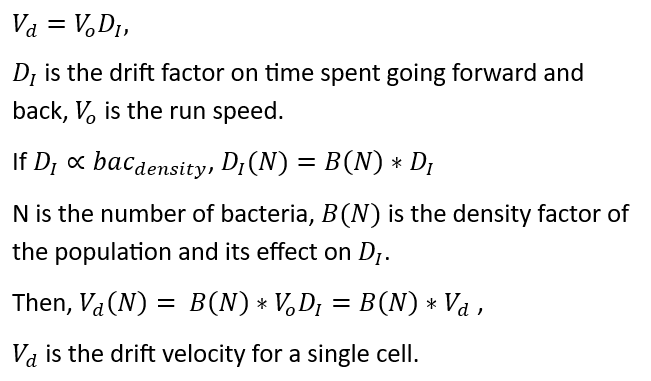

Tumble Rate Difference Proportional to Drift Index

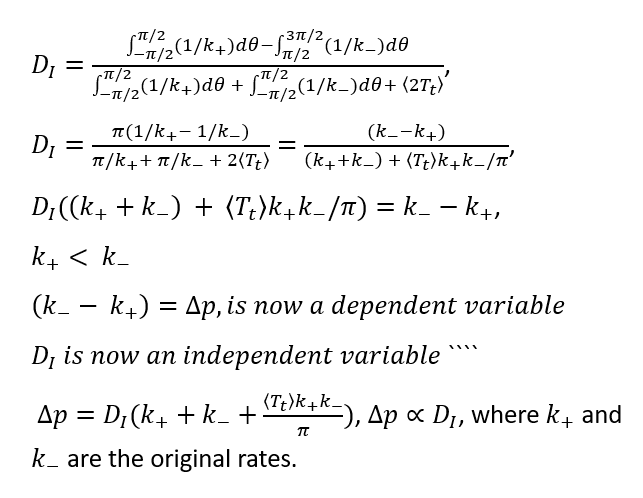

In [10]:
from math import cos
# Integrate the tumble rates to figure out run-to-tumble times.
def integrand(x, a):
    return a*cos(x)

for i in deme_param.index.values:
#     print(deme_param.loc[i, "rate_tum_up"])
#     print(deme_param.loc[i, "rate_tum_down"])
    a = deme_param.loc[i, "rate_tum_up"]
    I = sp.integrate.quad(integrand, -(np.pi)/2, (np.pi)/2, args=a)
    print(I[0])
    a = deme_param.loc[i, "rate_tum_down"]
    I = sp.integrate.quad(integrand, (np.pi)/2, (3*(np.pi))/2, args=a)
    print(I[0])
    break

# deme_param["integrate_tum_up"] = deme_param.apply(lambda x: x["rate_tum_up"], axis="columns")
# deme_param

0.6209859993779216
-0.6330164332388039


### R and T ML Model

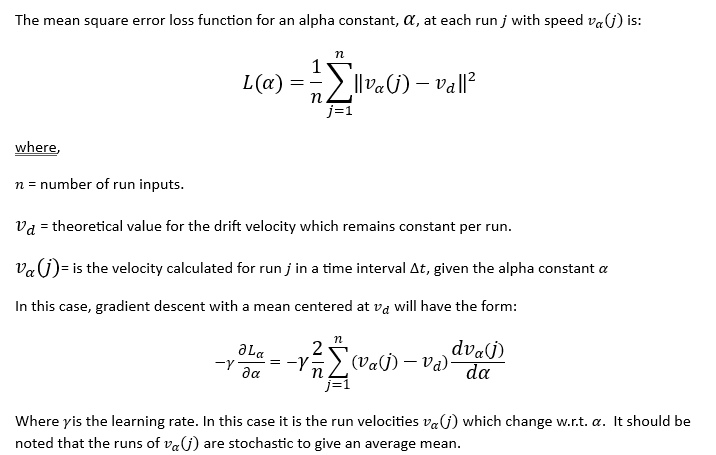

In [12]:
mig_rate_df.to_csv("mig_rate_df.csv")